In [6]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import scipy.ndimage.morphology

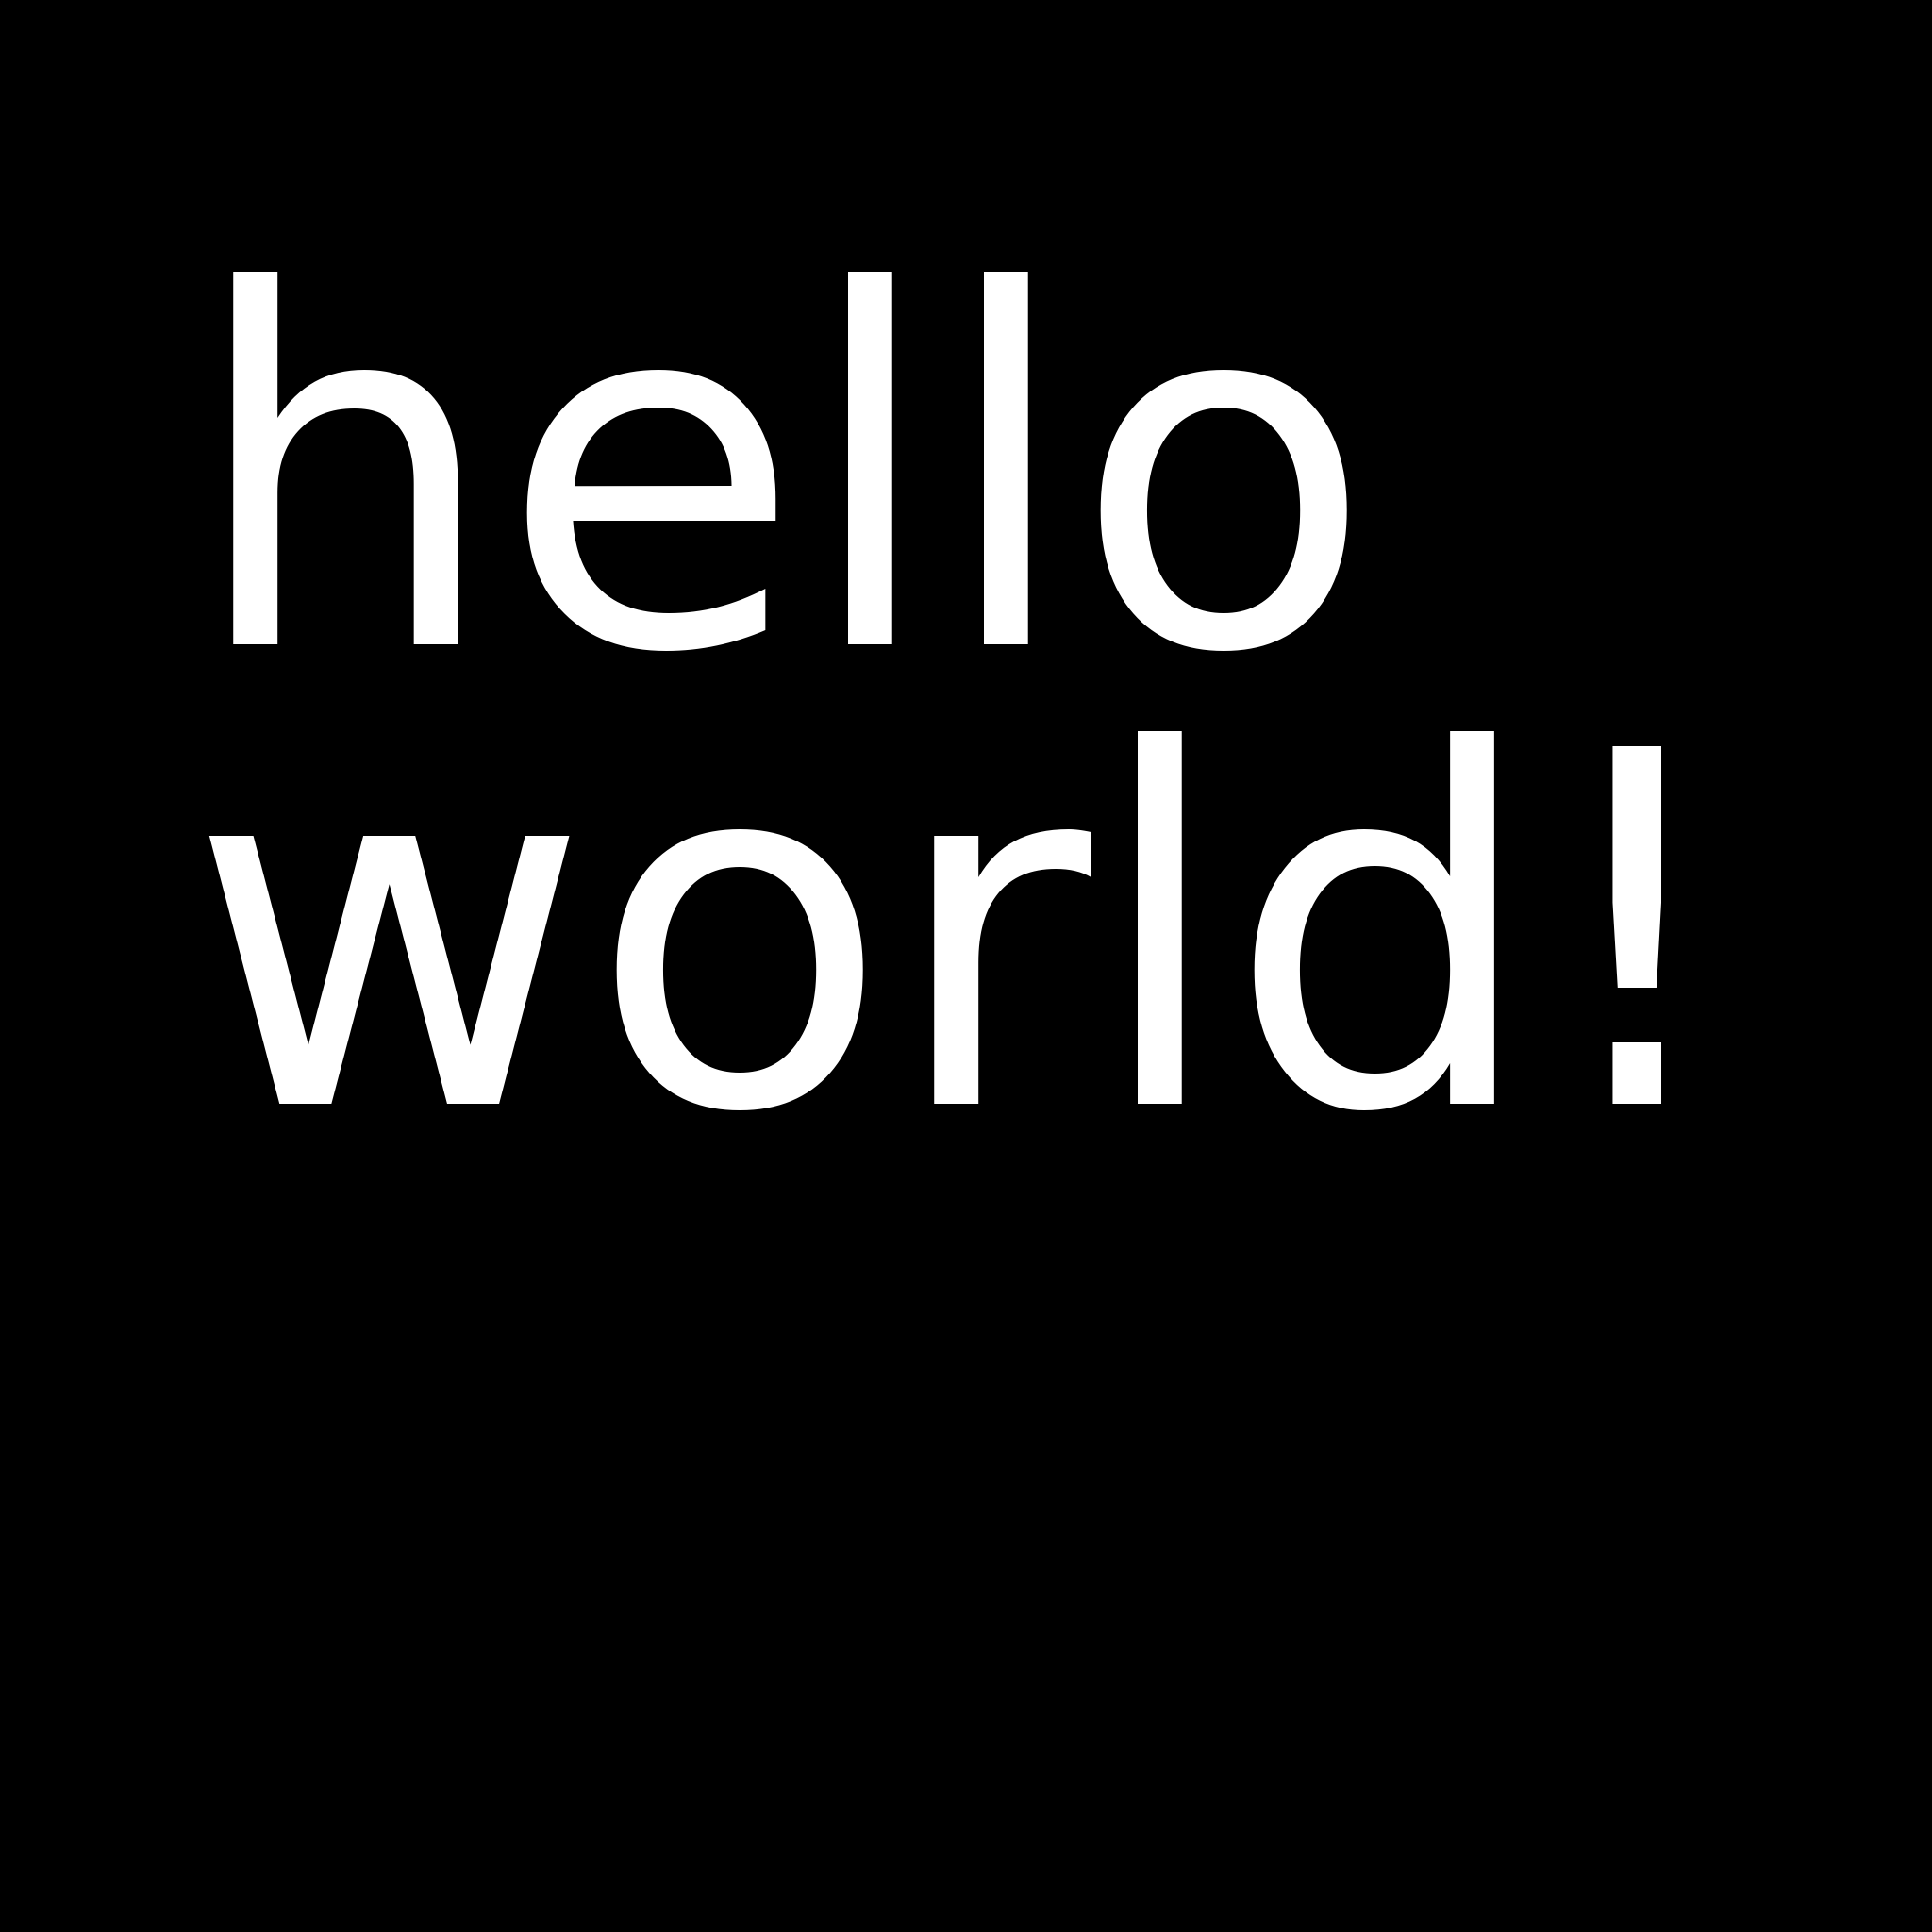

In [5]:
i = Image.new('L', (2048, 2048))
font = ImageFont.truetype('/usr/share/fonts/truetype/ttf-dejavu/DejaVuSans.ttf', 260 * 2)
draw = ImageDraw.Draw(i)
draw.text((200, 200), "hello\nworld!", font=font, fill=255)
i

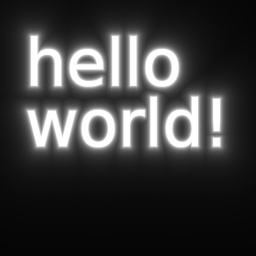

In [9]:
sdf = scipy.ndimage.morphology.distance_transform_edt(np.array(i).astype('f4') < 0.5) / 2
sdf = scipy.ndimage.gaussian_filter(sdf, 2)
sdf = scipy.ndimage.zoom(sdf, 1 / 8)

Image.fromarray((255 / (0.1 * sdf + 1)).astype('u1'))

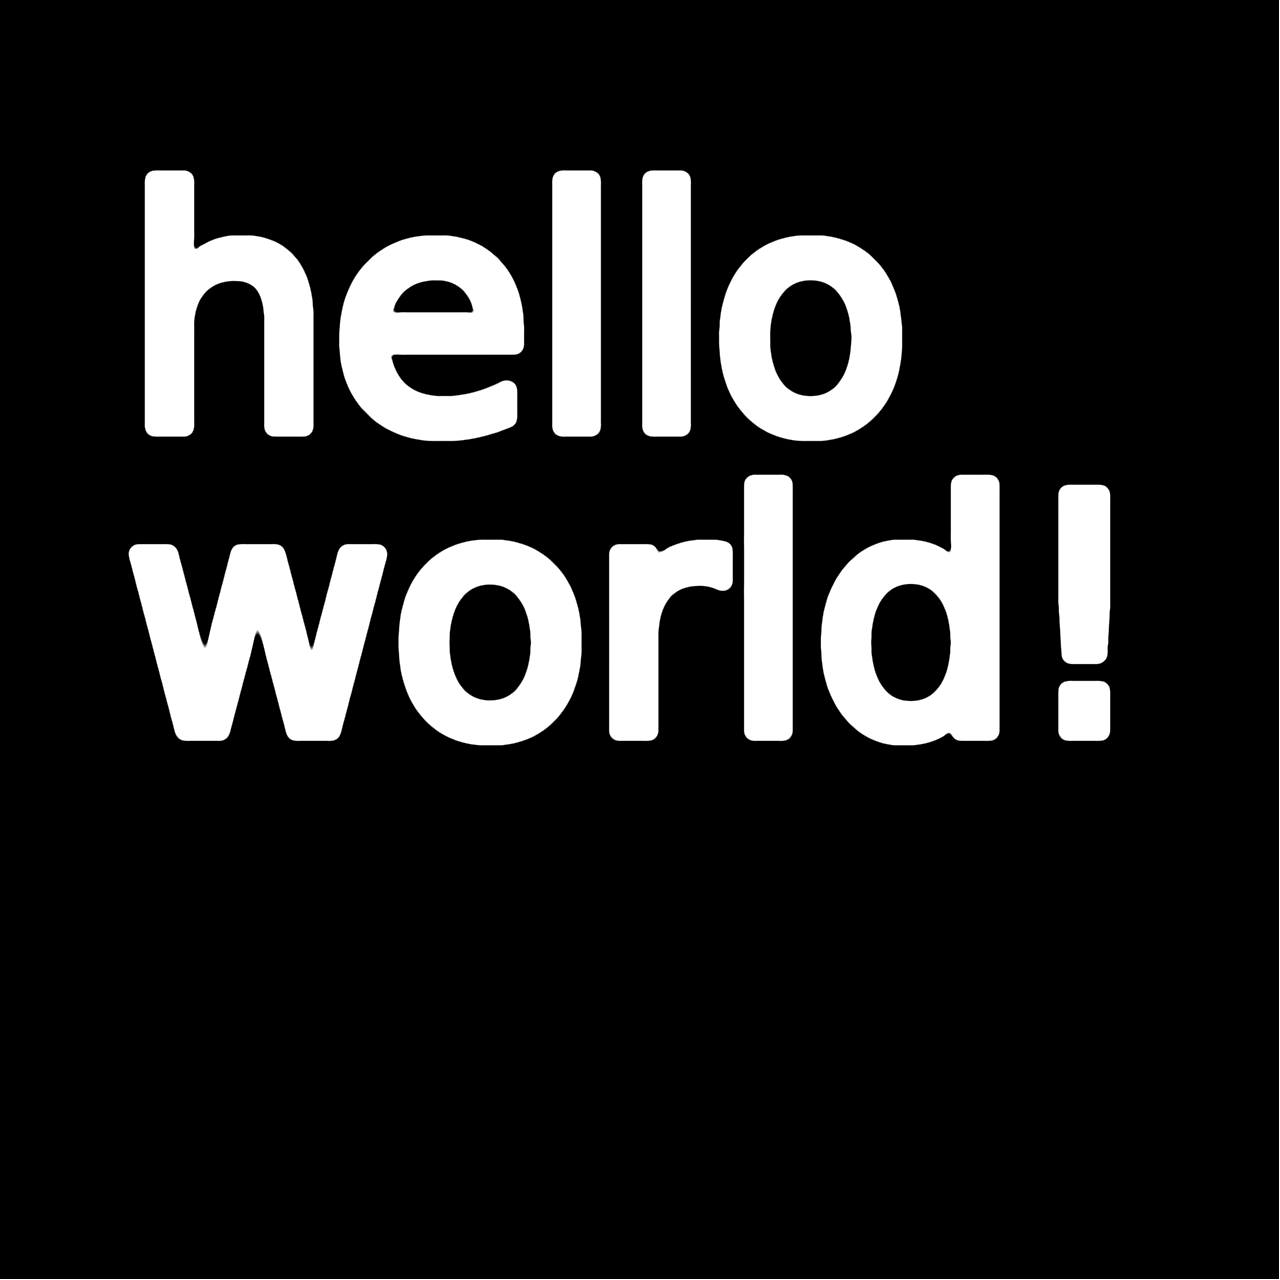

In [10]:
scale = 5
rad = 1.5 * scale + 1
large = scipy.ndimage.zoom(sdf, scale, order=2)
Image.fromarray((np.clip(rad - large * (scale / 5), 0, 1) * 255).astype('u1'))